In [ ]:
!pip installl requests_oauthlib
!pip install twython
!pip install nltk

ERROR: unknown command "installl" - maybe you meant "install"


In [ ]:
from pyspark.streaming import StreamingContext
from pyspark import SparkConf
import nltk
import json
import re
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
INTERVALO_BATCH = 5
SSC = StreamingContext(sc, INTERVALO_BATCH)

/usr/local/lib/python3.12/dist-packages/pyspark/streaming/context.py:72: FutureWarning: DStream is deprecated as of Spark 3.4.0. Migrate to Structured Streaming.
  warnings.warn(


In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset_analise_sentimento.csv')
df.head()

,sentence,label
0,"I liked the first "" Mission Impossible.",1
1,I love Harry Potter..,1
2,"Not because I hate Harry Potter, but because I...",1
3,the story of Harry Potter is a deep and profou...,1
4,"The complaints I've seen about the "" Vito-bein...",1


In [ ]:
stop = set(stopwords.words("portuguese"))

def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"http\\S+|www\\S+", "", texto)
    texto = re.sub(r"[^a-zà-ú0-9 ]", " ", texto)
    palavras = [p for p in texto.split() if p not in stop]
    return " ".join(palavras)

df["clean"] = df["sentence"].apply(limpar_texto)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df["score"] = df["clean"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentimento"] = df["score"].apply(lambda x: "positivo" if x > 0.2
                                     else "negativo" if x < -0.2
                                     else "neutro")

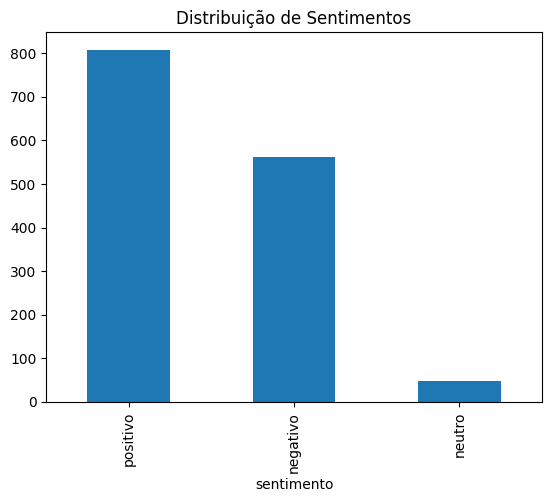

In [ ]:
import matplotlib.pyplot as plt

df["sentimento"].value_counts().plot(kind="bar")
plt.title("Distribuição de Sentimentos")
plt.show()

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

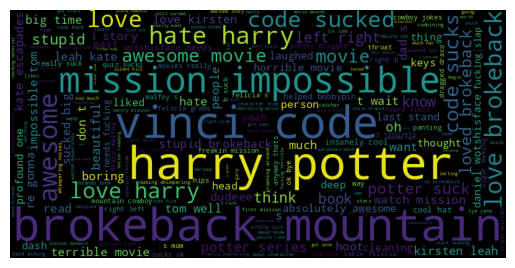

In [ ]:
from wordcloud import WordCloud

texto = " ".join(df["clean"])
wc = WordCloud(width=800, height=400).generate(texto)
plt.imshow(wc)
plt.axis("off")

In [ ]:
df.to_csv("dataset_analise_sentimentos2.csv", index=False)